In [88]:
import numpy as np

class HopfieldNetwork:

  def __init__(self, num_neurons):
    self.num_neurons = num_neurons
    self.states  = np.random.choice([-1,1], size=num_neurons)
    self.biases  = np.random.uniform(-1,1, size=num_neurons)
    self.weights = np.random.uniform(-1,1, size=(num_neurons,num_neurons))
    self.weights = 0.5 *(self.weights + self.weights.T)
    np.fill_diagonal(self.weights, 0)

  def update_state(self):
    #neuron_index = np.random.randint(0, self.num_neurons)
    for neuron_index in np.arange(num_neurons):
        activation = np.dot(self.weights[neuron_index], self.states) - self.biases[neuron_index]
        self.states[neuron_index] = np.sign(activation)

  def compute_energy(self):
      W_s = np.dot(self.weights, self.states)
      energy = np.dot(self.states,W_s)
      return -0.5 * energy - np.dot(self.biases , self.states)

  def run_until_convergence(self, max_steps=10000, update_interval=100):
        energy_list = []
        for _ in range(max_steps):
            self.update_state()
            if _ % update_interval == 0:
                energy = self.compute_energy()
                energy_list.append(energy)
            if len(energy_list) > 1 and energy_list[-1] > energy_list[-2]:
                break
        return energy_list

  def set_state(self, new_states):
      if len(new_states) == self.num_neurons:
          self.states = np.array(new_states)
      else:
          print("Error: State size mismatch!")

  def get_state(self):
      return self.states

if __name__ == "__main__":
  seed = 10
  np.random.seed(seed)
  num_neurons = 10
  hopfield_net = HopfieldNetwork(num_neurons)
  print("Initial State:", hopfield_net.get_state())
  while not hopfield_net.run_until_convergence():
      hopfield_net.update_state()

  print("Converged State:", hopfield_net.get_state())
  print("Energy:", hopfield_net.compute_energy())

Initial State: [ 1  1 -1  1 -1  1  1 -1  1  1]
Converged State: [ 1  1 -1  1  1 -1 -1  1 -1 -1]
Energy: 1.4808249470244332


*energy goes down during run*

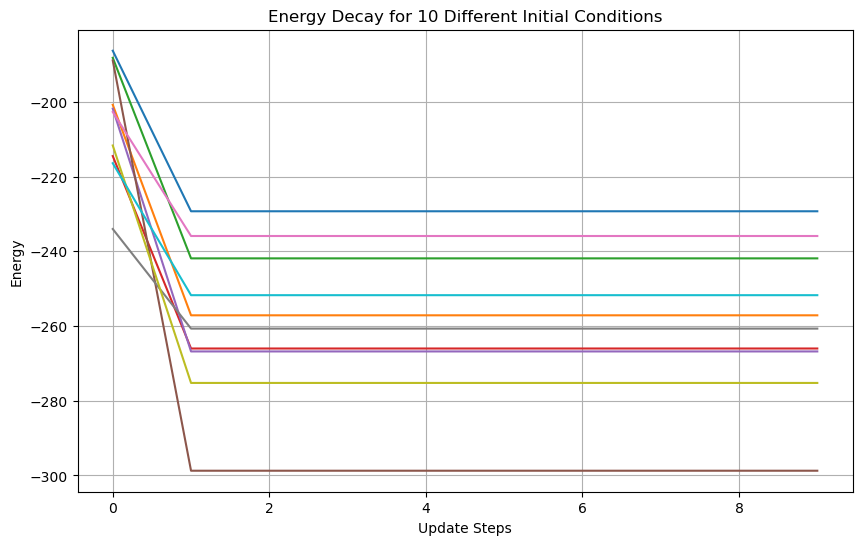

In [90]:
import matplotlib.pyplot as plt
seed = 10
np.random.seed(seed)
num_neurons = 100
num_initial_conditions = 10
max_steps = 1000
update_interval = 100

plt.figure(figsize=(10, 6))
for _ in range(num_initial_conditions):
    hopfield_net = HopfieldNetwork(num_neurons)
    energy_list = hopfield_net.run_until_convergence(max_steps, update_interval)
    plt.plot(range(len(energy_list)), energy_list)

plt.xlabel('Update Steps')
plt.ylabel('Energy')
plt.title('Energy Decay for 10 Different Initial Conditions')
plt.grid(True)
plt.show()


***Training***

In [91]:
def train(patterns, hopfield_net):
  num_patterns = len(patterns)
  pattern_length = len(patterns[0])

  for pattern in patterns:
    pattern = np.array(pattern)
    weight_update = np.outer(pattern, pattern) / pattern_length
    np.fill_diagonal(weight_update, 0)
    hopfield_net.weights += weight_update
  return hopfield_net.weights

def retrieve_pattern(hopfield_net, input_pattern, max_steps=1000):
        hopfield_net.states = input_pattern
        for _ in range(max_steps):
            hopfield_net.update_state()
        return hopfield_net.states

In [92]:
seed = 11
np.random.seed(seed)
binary_array = np.random.choice([-1, 1], size=(10, 10))
orig_array = np.copy(binary_array)
hopfield_net = HopfieldNetwork(binary_array.size)
hopfield_net.weights
hopfield_net.biases = 0*hopfield_net.biases

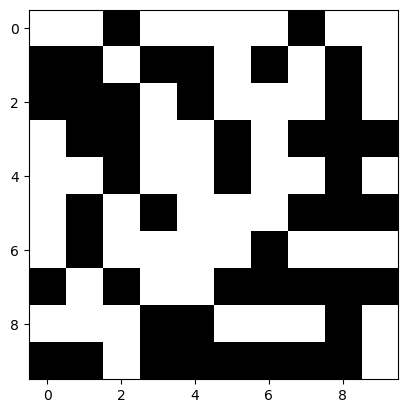

In [93]:
plt.imshow(binary_array, cmap='gray', vmin=-1, vmax=1)
plt.show()

In [94]:
train([orig_array.flatten()],hopfield_net)

array([[ 0.        ,  0.1210692 ,  0.02346405, ..., -0.15000097,
        -0.15107824, -0.66384302],
       [ 0.1210692 ,  0.        , -0.05042334, ...,  0.20474562,
        -0.19425766, -0.05949064],
       [ 0.02346405, -0.05042334,  0.        , ...,  0.01436696,
        -0.59313391,  0.49812568],
       ...,
       [-0.15000097,  0.20474562,  0.01436696, ...,  0.        ,
         0.50701969, -0.73024963],
       [-0.15107824, -0.19425766, -0.59313391, ...,  0.50701969,
         0.        ,  0.39664314],
       [-0.66384302, -0.05949064,  0.49812568, ..., -0.73024963,
         0.39664314,  0.        ]])

In [95]:
#binary_array[:, :binary_array.shape[1] // 4] = -1

binary_array[np.random.choice(np.arange(binary_array.size//20))] *= -1

In [99]:
retrieved_image = retrieve_pattern(hopfield_net,binary_array.flatten(),1000)
retrieved_image * orig_array.flatten()

array([-1, -1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
        1, -1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1])

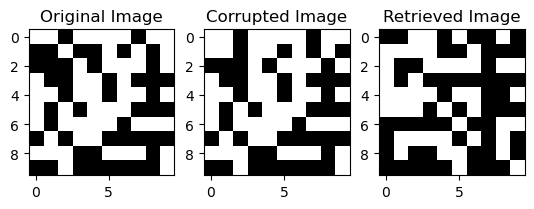

In [100]:
retrieved_image = retrieved_image.reshape(binary_array.shape)
plt.subplot(1, 3, 1)
plt.imshow(orig_array, cmap='gray', vmin=-1, vmax=1)
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(binary_array, cmap='gray', vmin=-1, vmax=1)
plt.title('Corrupted Image')
plt.subplot(1, 3, 3)
plt.imshow(retrieved_image, cmap='gray', vmin=-1, vmax=1)
plt.title('Retrieved Image')
plt.show()